# Oil & Gas Production Data Analysis

Author: Promise Ekeh

Date: 22/05/2024

In [1]:
%load_ext autoreload

%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import *

# Data Collection and Preparation

In [2]:
data= pd.read_csv('../data/dataverse_files/Ross-Mahdavi Oil and Gas 1932-2014.csv')

In [3]:
data.head()

cty_name  iso3numeric   id  year       eiacty  oil_prod32_14  \
0  Afghanistan            4  AFG  1932  Afghanistan            NaN   
1  Afghanistan            4  AFG  1933  Afghanistan            NaN   
2  Afghanistan            4  AFG  1934  Afghanistan            NaN   
3  Afghanistan            4  AFG  1935  Afghanistan            NaN   
4  Afghanistan            4  AFG  1936  Afghanistan            NaN   

   oil_price_2000  oil_price_nom  oil_value_nom  oil_value_2000  ...  \
0       10.860860           0.87            NaN             NaN  ...   
1        8.815239           0.67            NaN             NaN  ...   
2       12.715790           1.00            NaN             NaN  ...   
3       12.039690           0.97            NaN             NaN  ...   
4       13.383210           1.09            NaN             NaN  ...   

   net_gas_exports_mboe  net_gas_exports_value  net_gas_exports_valuePOP  \
0                   NaN                    NaN                       NaN   
1                   NaN                    NaN                       NaN   
2                   NaN                    NaN                       NaN   
3                   NaN                    NaN                       NaN   
4                   NaN                    NaN                       NaN   

   net_oil_gas_exports_valuePOP  population  pop_maddison  sovereign  \
0                           NaN         NaN           NaN          1   
1                           NaN         NaN           NaN          1   
2                           NaN         NaN           NaN          1   
3                           NaN         NaN           NaN          1   
4                           NaN         NaN           NaN          1   

   mult_nom_2000  mult_nom_2014  mult_2000_2014  
0      12.599874      17.321973        1.374774  
1      13.280064      18.257080        1.374774  
2      12.853008      17.669975        1.374774  
3      12.537882      17.236748        1.374774  
4      12.420786      17.075768        1.374774  

[5 rows x 41 columns]

# Exploratory Data Analysis (EDA):


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15521 entries, 0 to 15520
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   cty_name                      15521 non-null  object 
 1   iso3numeric                   15521 non-null  int64  
 2   id                            15106 non-null  object 
 3   year                          15521 non-null  int64  
 4   eiacty                        14254 non-null  object 
 5   oil_prod32_14                 10103 non-null  float64
 6   oil_price_2000                15503 non-null  float64
 7   oil_price_nom                 15521 non-null  float64
 8   oil_value_nom                 10103 non-null  float64
 9   oil_value_2000                10103 non-null  float64
 10  oil_value_2014                10103 non-null  float64
 11  gas_prod55_14                 8812 non-null   float64
 12  gas_price_2000_mboe           15521 non-null  float64
 13  g

In [5]:
data.describe()

iso3numeric          year  oil_prod32_14  oil_price_2000  \
count  15521.000000  15521.000000   1.010300e+04    15503.000000   
mean     440.102055   1973.000000   1.834108e+07       26.513076   
std      266.690184     23.959069   6.384938e+07       21.459869   
min        4.000000   1932.000000   0.000000e+00        7.879107   
25%      204.000000   1952.000000   0.000000e+00       11.710310   
50%      422.000000   1973.000000   4.980000e+04       14.067980   
75%      694.000000   1994.000000   4.025170e+06       36.535130   
max      998.000000   2014.000000   6.160000e+08       85.170708   

       oil_price_nom  oil_value_nom  oil_value_2000  oil_value_2014  \
count   15521.000000   1.010300e+04    1.010300e+04    1.010300e+04   
mean       19.407381   4.049737e+09    4.777023e+09    6.567325e+09   
std        27.819908   2.017801e+10    2.100122e+10    2.887193e+10   
min         0.670000   0.000000e+00    0.000000e+00    0.000000e+00   
25%         1.800000   0.000000e+00    0.000000e+00    0.000000e+00   
50%         3.290000   2.064857e+06    7.171990e+06    9.859862e+06   
75%        25.023256   3.808598e+08    6.935786e+08    9.535135e+08   
max       111.669702   4.044369e+11    3.401958e+11    4.676922e+11   

       gas_prod55_14  gas_price_2000_mboe  ...  net_gas_exports_mboe  \
count    8812.000000         1.552100e+04  ...           4016.000000   
mean      100.702009         1.403597e+07  ...             -0.357088   
std       462.242415         1.102009e+07  ...            146.611793   
min         0.000000         0.000000e+00  ...           -810.271076   
25%         0.000000         0.000000e+00  ...             -5.524986   
50%         0.000000         1.472159e+07  ...              0.000000   
75%        21.684397         1.915340e+07  ...              0.000000   
max      5605.121816         4.877320e+07  ...           1309.582987   

       net_gas_exports_value  net_gas_exports_valuePOP  \
count           3.880000e+03               3875.000000   
mean           -1.944983e+07                 60.045237   
std             3.552873e+09                562.366542   
min            -3.290943e+10               -918.095672   
25%            -8.709102e+07                 -8.372933   
50%             0.000000e+00                  0.000000   
75%             0.000000e+00                  0.000000   
max             6.281075e+10              11205.517349   

       net_oil_gas_exports_valuePOP    population  pop_maddison     sovereign  \
count                   3875.000000  1.290100e+04  1.180400e+04  15521.000000   
mean                     338.550092  2.822745e+07  2.729075e+07      0.676954   
std                     2182.837956  9.860353e+07  9.488217e+07      0.467655   
min                    -7760.660272  2.510100e+04  2.510100e+04      0.000000   
25%                      -81.010366  2.194275e+06  2.108201e+06      0.000000   
50%                        0.000000  6.469000e+06  6.178436e+06      1.000000   
75%                       17.434919  1.932096e+07  1.863778e+07      1.000000   
max                    32331.463722  1.364270e+09  1.331400e+09      1.000000   

       mult_nom_2000  mult_nom_2014  mult_2000_2014  
count   15521.000000   15521.000000    1.552100e+04  
mean        4.674194       6.425958    1.374774e+00  
std         3.873224       5.324805    2.220518e-16  
min         0.727393       1.000000    1.374774e+00  
25%         1.161943       1.597409    1.374774e+00  
50%         3.876222       5.328927    1.374774e+00  
75%         6.483330       8.913110    1.374774e+00  
max        13.280064      18.257080    1.374774e+00  

[8 rows x 38 columns]

In [6]:
data.shape

(15521, 41)

In [7]:
data.columns

Index(['cty_name', 'iso3numeric', 'id', 'year', 'eiacty', 'oil_prod32_14',
       'oil_price_2000', 'oil_price_nom', 'oil_value_nom', 'oil_value_2000',
       'oil_value_2014', 'gas_prod55_14', 'gas_price_2000_mboe',
       'gas_price_2000', 'gas_price_nom', 'gas_value_nom', 'gas_value_2000',
       'gas_value_2014', 'oil_gas_value_nom', 'oil_gas_value_2000',
       'oil_gas_value_2014', 'oil_gas_valuePOP_nom', 'oil_gas_valuePOP_2000',
       'oil_gas_valuePOP_2014', 'oil_exports', 'net_oil_exports',
       'net_oil_exports_mt', 'net_oil_exports_value',
       'net_oil_exports_valuePOP', 'gas_exports', 'net_gas_exports_bcf',
       'net_gas_exports_mboe', 'net_gas_exports_value',
       'net_gas_exports_valuePOP', 'net_oil_gas_exports_valuePOP',
       'population', 'pop_maddison', 'sovereign', 'mult_nom_2000',
       'mult_nom_2014', 'mult_2000_2014'],
      dtype='object')

In [8]:
use_col=['cty_name', 'id', 'year','oil_prod32_14',  'oil_price_2000', 'gas_prod55_14', 'oil_price_nom', 'oil_value_nom', 'oil_value_2000',
       'oil_value_2014', 'gas_price_2000', 'gas_price_nom', 'gas_value_nom', 'gas_value_2000',
       'gas_value_2014', 'oil_gas_value_nom', 'oil_gas_value_2000',
       'oil_gas_value_2014', 'oil_exports', 'net_oil_exports', 'net_oil_exports_value', 'gas_exports', 'net_gas_exports_bcf',
       'net_gas_exports_value',]

In [9]:
use_col_exports=['cty_name', 'id', 'year', 'oil_exports', 'net_oil_exports', 'net_oil_exports_value', 'gas_exports', 'net_gas_exports_bcf',
       'net_gas_exports_value',]

In [10]:
production_df=data[use_col].copy()
production_df.head(10)

cty_name   id  year  oil_prod32_14  oil_price_2000  gas_prod55_14  \
0  Afghanistan  AFG  1932            NaN       10.860860            NaN   
1  Afghanistan  AFG  1933            NaN        8.815239            NaN   
2  Afghanistan  AFG  1934            NaN       12.715790            NaN   
3  Afghanistan  AFG  1935            NaN       12.039690            NaN   
4  Afghanistan  AFG  1936            NaN       13.383210            NaN   
5  Afghanistan  AFG  1937            NaN       13.981300            NaN   
6  Afghanistan  AFG  1938            NaN       13.660590            NaN   
7  Afghanistan  AFG  1939            NaN       12.499090            NaN   
8  Afghanistan  AFG  1940            NaN       12.377740            NaN   
9  Afghanistan  AFG  1941            NaN       13.175180            NaN   

   oil_price_nom  oil_value_nom  oil_value_2000  oil_value_2014  ...  \
0           0.87            NaN             NaN             NaN  ...   
1           0.67            NaN             NaN             NaN  ...   
2           1.00            NaN             NaN             NaN  ...   
3           0.97            NaN             NaN             NaN  ...   
4           1.09            NaN             NaN             NaN  ...   
5           1.18            NaN             NaN             NaN  ...   
6           1.13            NaN             NaN             NaN  ...   
7           1.02            NaN             NaN             NaN  ...   
8           1.02            NaN             NaN             NaN  ...   
9           1.14            NaN             NaN             NaN  ...   

   gas_value_2014  oil_gas_value_nom  oil_gas_value_2000  oil_gas_value_2014  \
0             NaN                NaN                 NaN                 NaN   
1             NaN                NaN                 NaN                 NaN   
2             NaN                NaN                 NaN                 NaN   
3             NaN                NaN                 NaN                 NaN   
4             NaN                NaN                 NaN                 NaN   
5             NaN                NaN                 NaN                 NaN   
6             NaN                NaN                 NaN                 NaN   
7             NaN                NaN                 NaN                 NaN   
8             NaN                NaN                 NaN                 NaN   
9             NaN                NaN                 NaN                 NaN   

   oil_exports  net_oil_exports  net_oil_exports_value  gas_exports  \
0          NaN              NaN                    NaN          NaN   
1          NaN              NaN                    NaN          NaN   
2          NaN              NaN                    NaN          NaN   
3          NaN              NaN                    NaN          NaN   
4          NaN              NaN                    NaN          NaN   
5          NaN              NaN                    NaN          NaN   
6          NaN              NaN                    NaN          NaN   
7          NaN              NaN                    NaN          NaN   
8          NaN              NaN                    NaN          NaN   
9          NaN              NaN                    NaN          NaN   

   net_gas_exports_bcf  net_gas_exports_value  
0                  NaN                    NaN  
1                  NaN                    NaN  
2                  NaN                    NaN  
3                  NaN                    NaN  
4                  NaN                    NaN  
5                  NaN                    NaN  
6                  NaN                    NaN  
7                  NaN                    NaN  
8                  NaN                    NaN  
9                  NaN                    NaN  

[10 rows x 24 columns]

In [11]:
production_df.shape

(15521, 24)

In [12]:
production_df.isna().sum()

cty_name                     0
id                         415
year                         0
oil_prod32_14             5418
oil_price_2000              18
gas_prod55_14             6709
oil_price_nom                0
oil_value_nom             5418
oil_value_2000            5418
oil_value_2014            5418
gas_price_2000            4301
gas_price_nom                0
gas_value_nom             6709
gas_value_2000            6709
gas_value_2014            6709
oil_gas_value_nom         5287
oil_gas_value_2000        5287
oil_gas_value_2014        5287
oil_exports              11011
net_oil_exports          11011
net_oil_exports_value    11011
gas_exports              11503
net_gas_exports_bcf      11505
net_gas_exports_value    11641
dtype: int64

# Visualisation

## Top Oil/Gas Production

### Grouped Bar charts

<Axes: xlabel='year'>

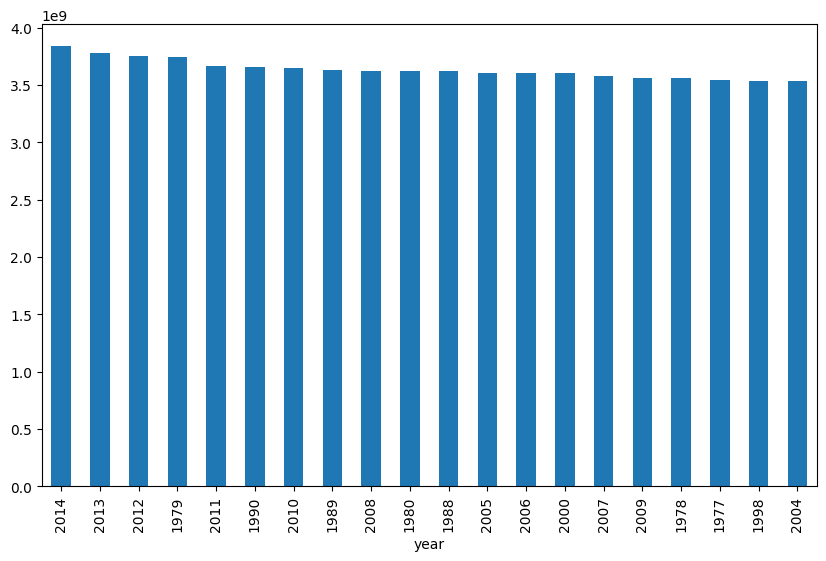

In [13]:
production_df.groupby('year')['oil_prod32_14'].sum().sort_values(ascending=False).head(20).plot(kind='bar', figsize=(10, 6))


Top 20 Years with highest oil production
2014 had the highest total oil production

Top 20 Years with highest gas production
2011 had the highest total gas production

<Axes: xlabel='cty_name'>

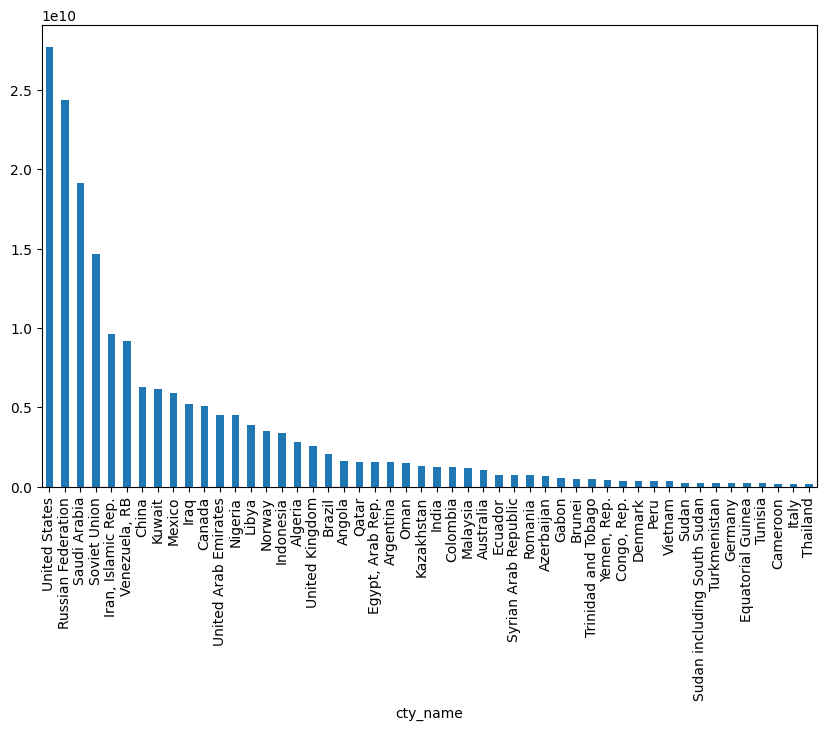

In [11]:
# Top total production
data.groupby('cty_name')['oil_prod32_14'].sum().sort_values(ascending=False).head(50).plot(kind='bar', figsize=(10, 6))


The above plot shows the top total 10 oil production countries between 1932 to 2014.
United stated produced the highest oil production with the 82 year period

<Axes: xlabel='cty_name'>

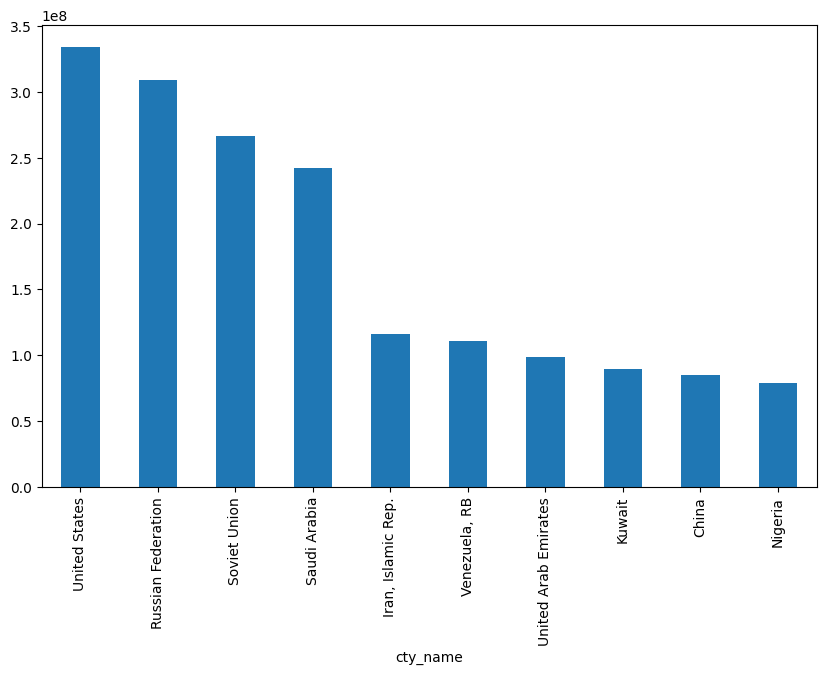

In [16]:
# Top average production
production_df.groupby('cty_name')['oil_prod32_14'].mean().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10, 6))

The above plot shows the top average 10 oil production countries between 1932 to 2014.
United stated produced the highest oil production with the 82 year period

In [17]:
# plot top yearly production




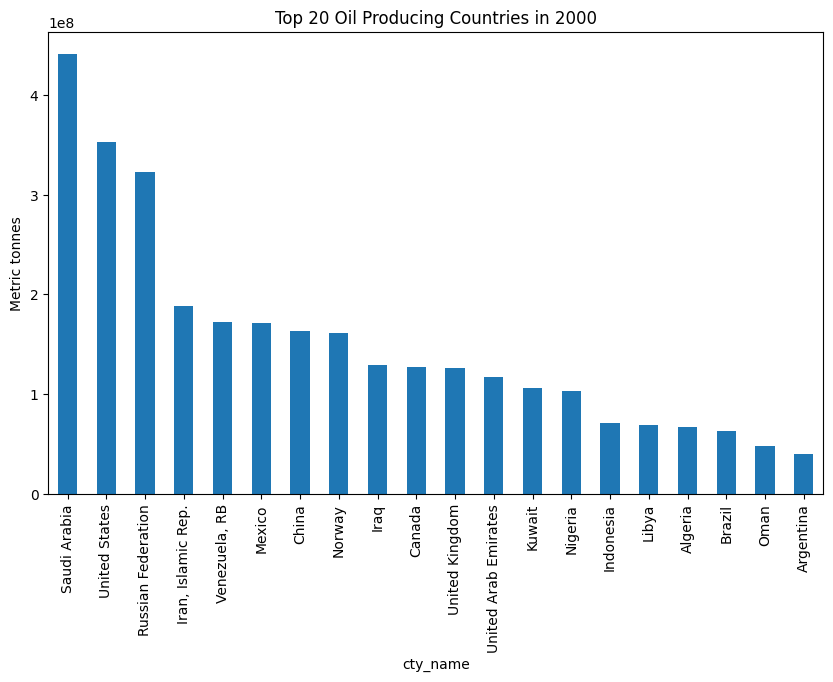

In [18]:
plot_bar_yearly_production(production_df, 2000, topn=20)

The above plot shows the top 10 oil production countries for 2000.
Saudi Arabia produced the highest oil in 2000

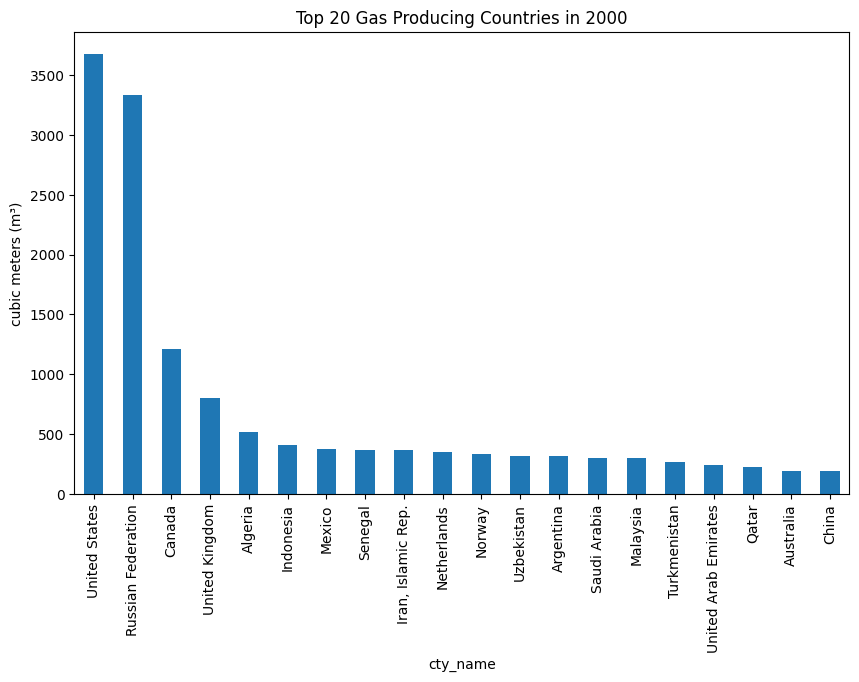

In [19]:
plot_bar_yearly_production(production_df, 2000, product='gas', topn=20)


## Pivot Tables

In [ ]:
topn=10

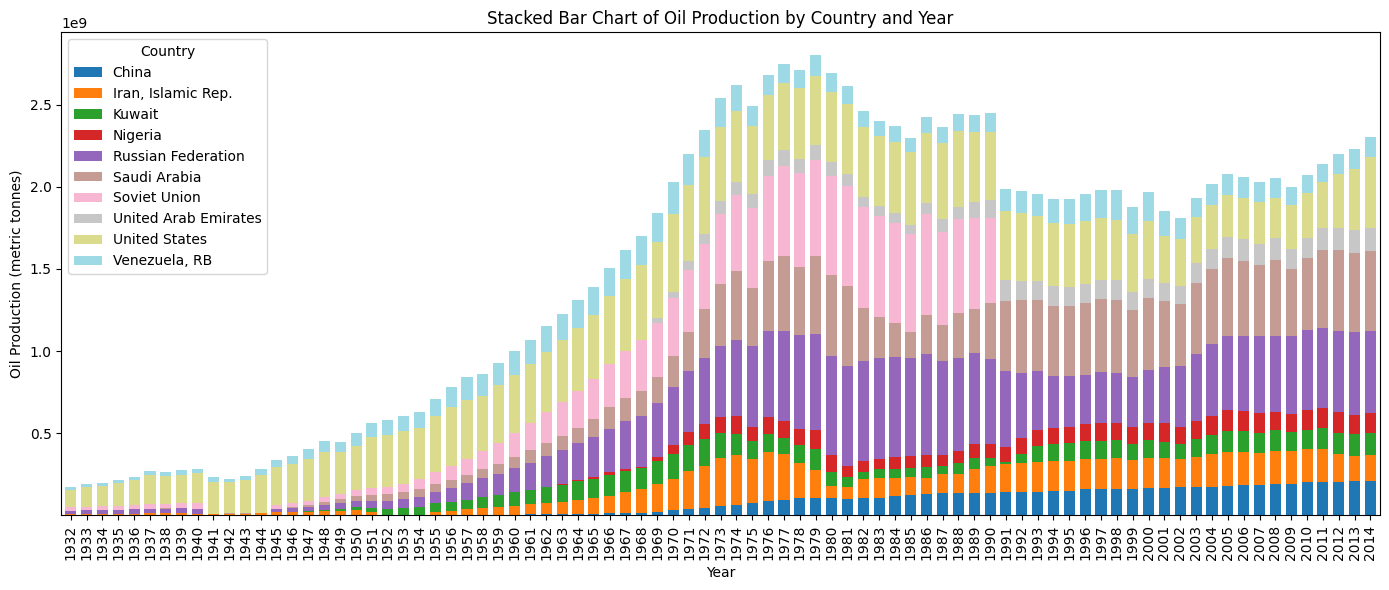

In [59]:
# Filter the dataset to include only necessary columns
data_filtered = data[['year', 'cty_name', 'oil_prod32_14']]

top_countries_oil = data.groupby('cty_name')['oil_prod32_14'].mean().nlargest(topn).index
data_filtered = data_filtered[data_filtered['cty_name'].isin(top_countries_oil)]


# Aggregate production data by year and cty_name
production_by_cty_name_year = data_filtered.groupby(['year', 'cty_name']).sum().reset_index()

# Pivot the data to have years as index and countries as columns
oil_prod32_14_pivot = production_by_cty_name_year.pivot(index='year', columns='cty_name', values='oil_prod32_14').fillna(0)


# Plot the stacked bar chart for oil production
fig, ax = plt.subplots(figsize=(14, 6))
oil_prod32_14_pivot.plot(kind='bar', stacked=True, ax=ax, cmap='tab20', width=0.7)
ax.set_xlabel('Year')
ax.set_ylabel('Oil Production (metric tonnes)')
ax.set_title('Stacked Bar Chart of Oil Production by Country and Year')
ax.legend(title='Country', loc='upper left')
plt.tight_layout()
plt.show()

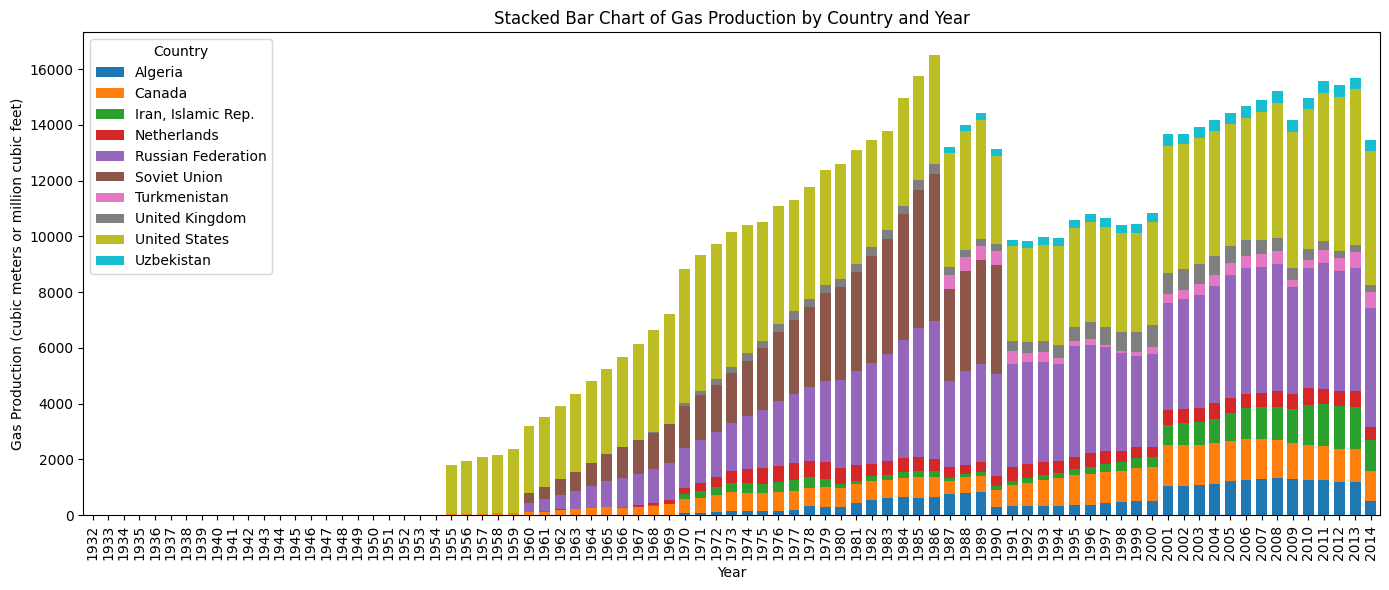

In [40]:
# Filter the dataset to include only necessary columns
data_filtered = data[['year', 'cty_name', 'gas_prod55_14']]

top_countries_gas = data.groupby('cty_name')['gas_prod55_14'].mean().nlargest(topn).index
data_filtered = data_filtered[data_filtered['cty_name'].isin(top_countries_gas)]


# Aggregate production data by year and cty_name
production_by_cty_name_year = data_filtered.groupby(['year', 'cty_name']).sum().reset_index()

# Pivot the data to have years as index and countries as columns
gas_prod55_14_pivot = production_by_cty_name_year.pivot(index='year', columns='cty_name', values='gas_prod55_14').fillna(0)

# Plot the stacked bar chart for gas production
fig, ax = plt.subplots(figsize=(14, 6))
gas_prod55_14_pivot.plot(kind='bar', stacked=True, ax=ax, cmap='tab20', width=0.7)
ax.set_xlabel('Year')
ax.set_ylabel('Gas Production (cubic meters or million cubic feet)')
ax.set_title('Stacked Bar Chart of Gas Production by Country and Year')
ax.legend(title='Country', loc='upper left')
plt.tight_layout()
plt.show()


### Area Chart

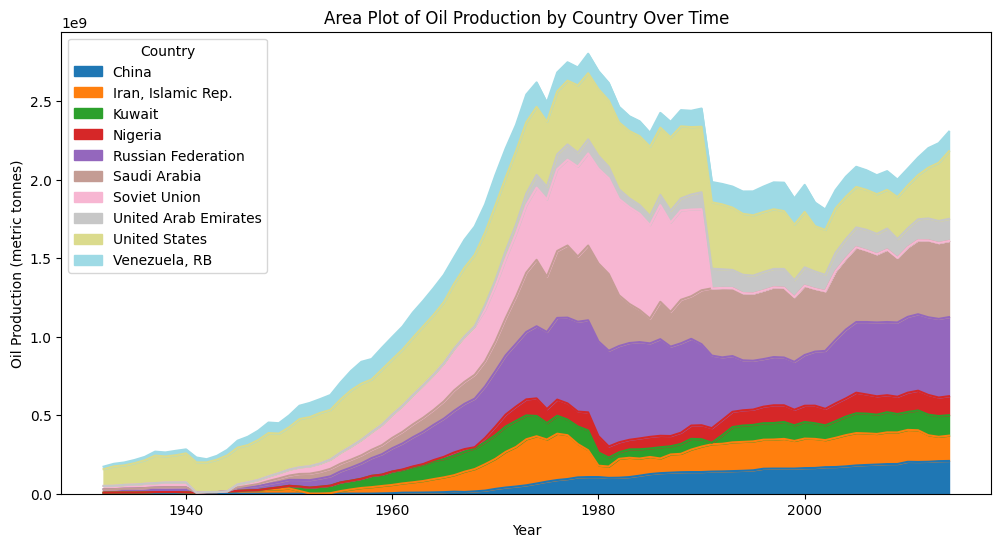

In [50]:
# Plot the area chart for oil production
# plt.figure(figsize=(12, 6))
oil_prod32_14_pivot.plot(kind='area', stacked=True, figsize=(12, 6), colormap='tab20', legend=False)
plt.xlabel('Year')
plt.ylabel('Oil Production (metric tonnes)')
plt.title('Area Plot of Oil Production by Country Over Time')
plt.legend(title='Country', loc='upper left')
plt.show()

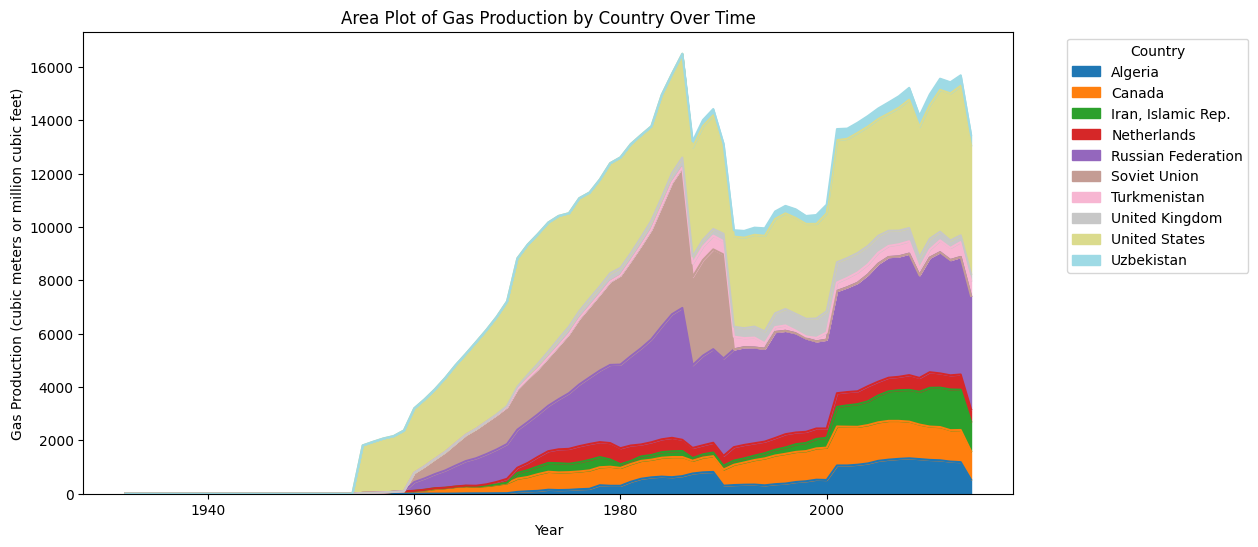

In [51]:
# Plot the area chart for gas production
gas_prod55_14_pivot.plot(kind='area', stacked=True, figsize=(12, 6), colormap='tab20', legend=False)
plt.xlabel('Year')
plt.ylabel('Gas Production (cubic meters or million cubic feet)')
plt.title('Area Plot of Gas Production by Country Over Time')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Heatmap

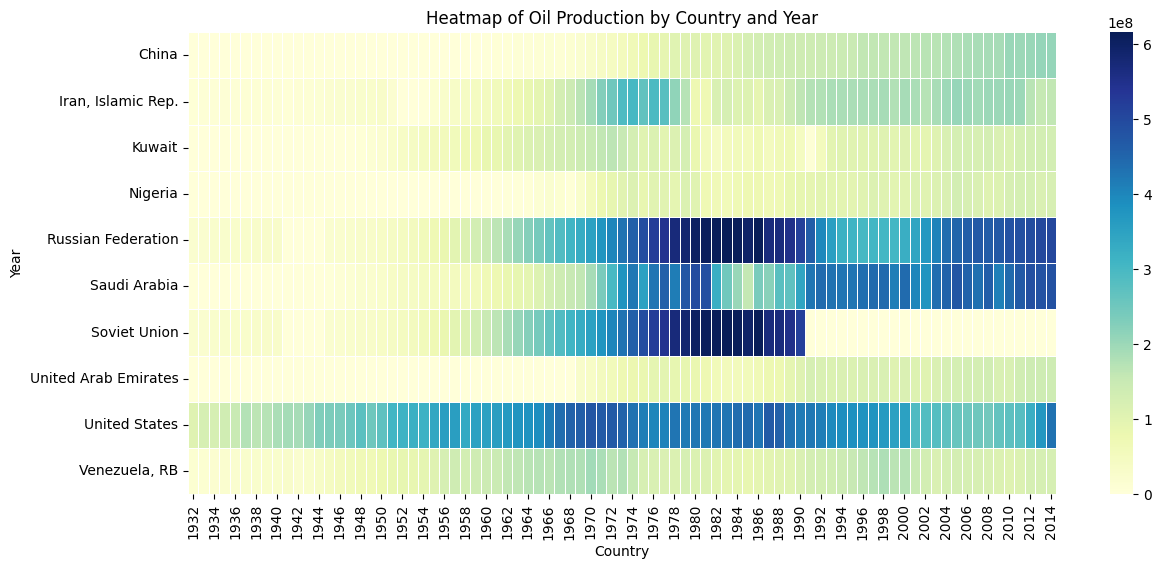

In [44]:
import seaborn as sns

# Create a heatmap for oil production
plt.figure(figsize=(14, 6))
sns.heatmap(oil_prod32_14_pivot.T, cmap='YlGnBu', linewidths=.5)
plt.xlabel('Country')
plt.ylabel('Year')
plt.title('Heatmap of Oil Production by Country and Year')
plt.show()


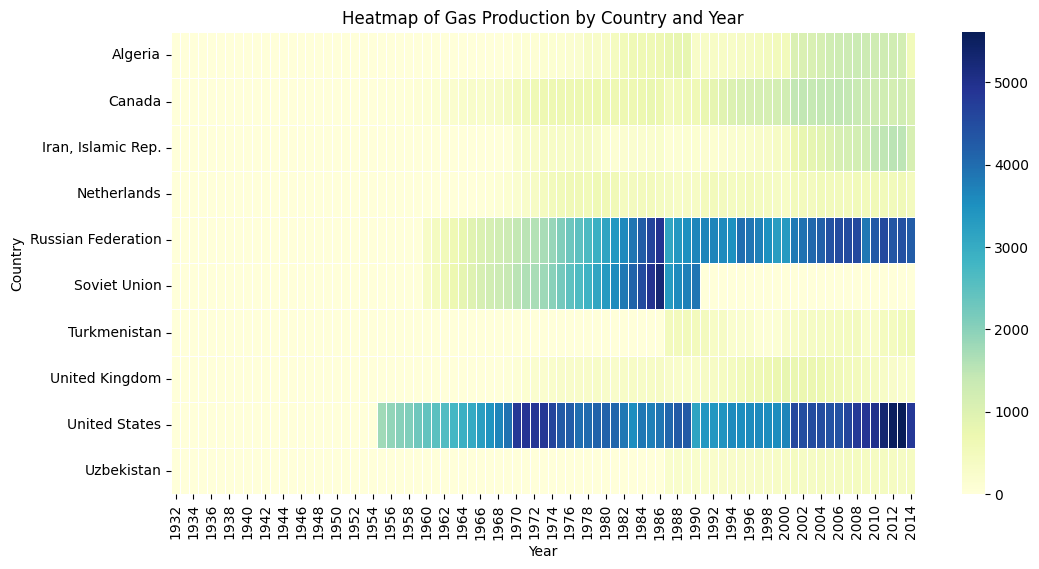

In [54]:
# Create a heatmap for gas production
plt.figure(figsize=(12, 6))
sns.heatmap(gas_prod55_14_pivot.T, cmap='YlGnBu', linewidths=.5)
plt.ylabel('Country')
plt.xlabel('Year')
plt.title('Heatmap of Gas Production by Country and Year')
plt.show()

In [29]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viri

gas production began in 1955 with the United state and canada, the US producing the highest this continued till 1960 when Russia and Soviet Union joined the production.

## Top Production Over time

Text(0.5, 1.0, 'Top 10 total oil production')

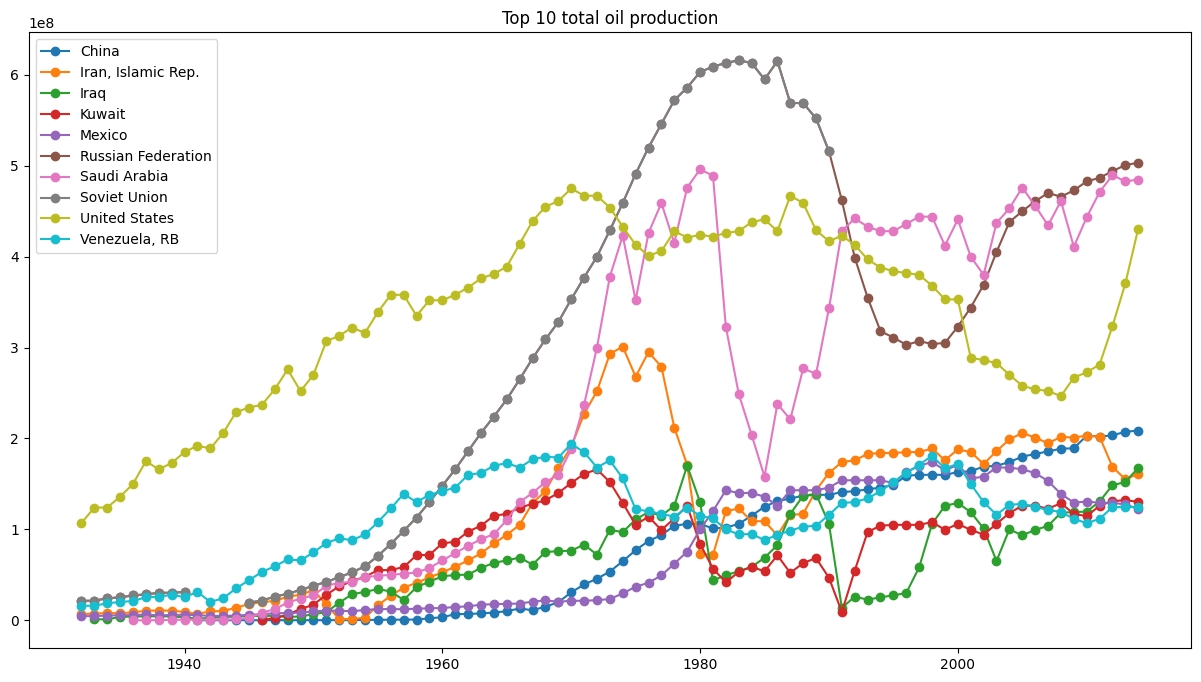

In [20]:
total_production = production_df.groupby('cty_name')['oil_prod32_14'].sum().nlargest(10)
top_countries = total_production.index

top_df = production_df[production_df['cty_name'].isin(top_countries)]

# Create the plot
plt.figure(figsize=(15, 8))

# Group by country and plot each country's oil production over time
for country, group_data in top_df.groupby('cty_name'):
    plt.plot(group_data['year'], group_data['oil_prod32_14'], marker='o', label=country)

plt.legend()
plt.title('Top 10 total oil production')

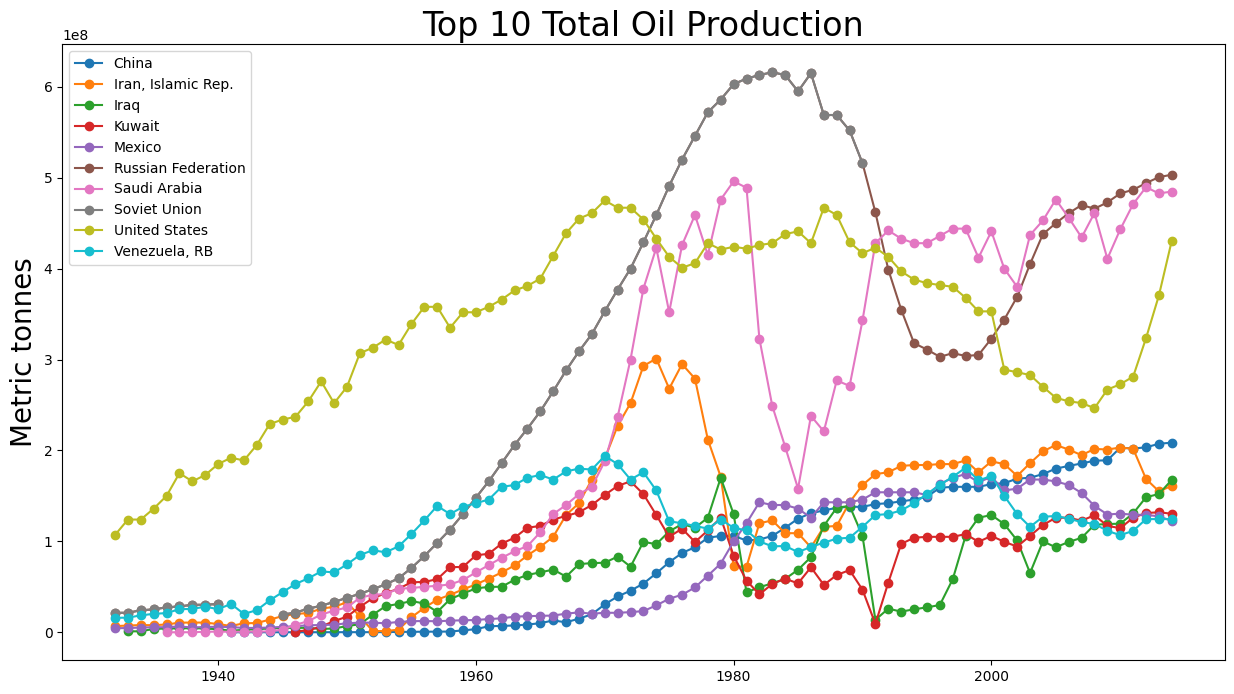

In [21]:
plot_topn_production (production_df)

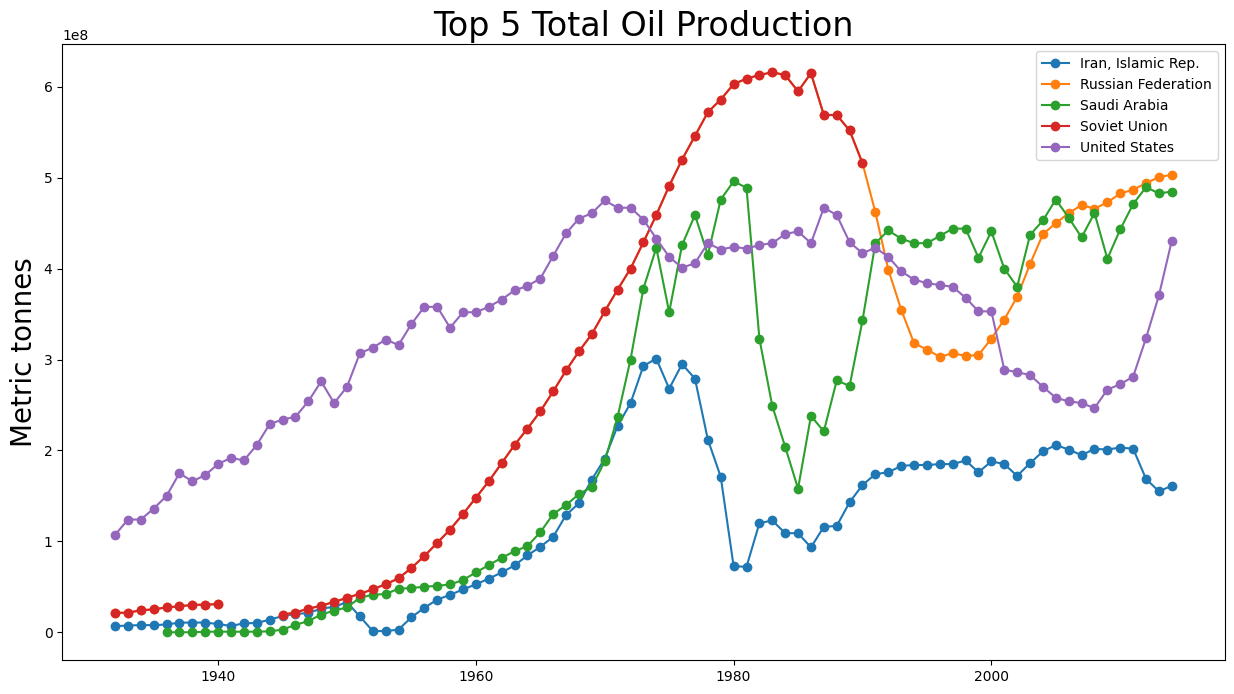

In [22]:
plot_topn_production (production_df, topn=5)

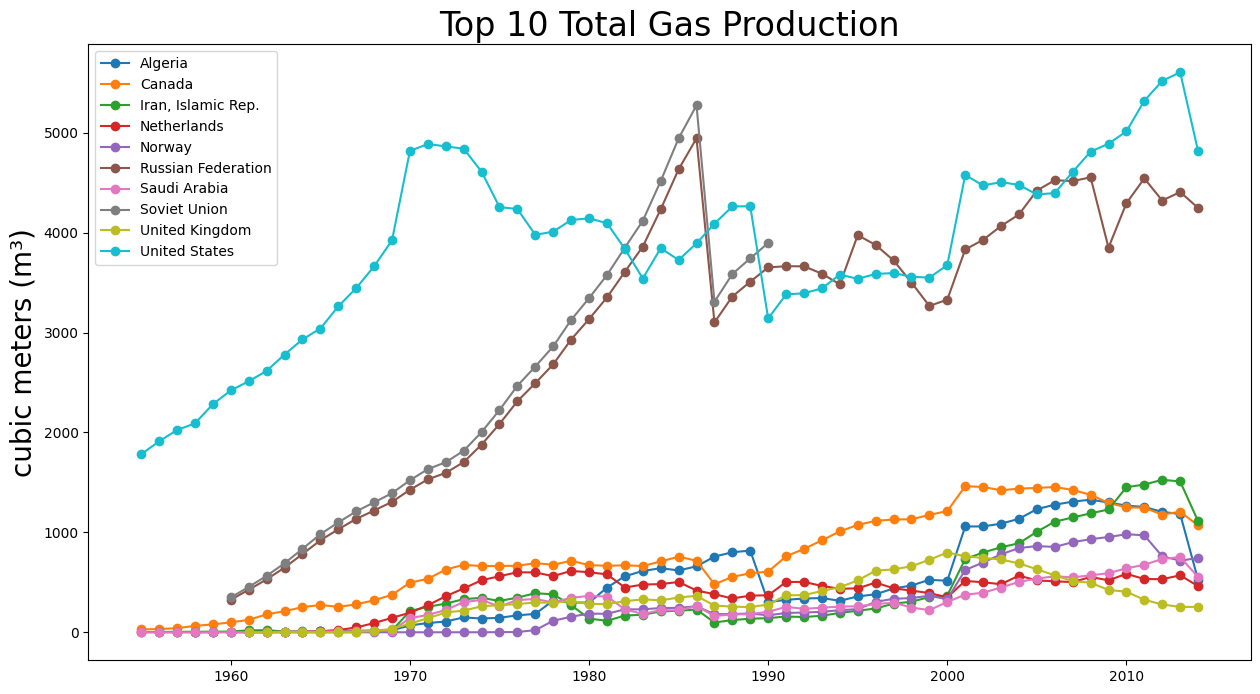

In [23]:
plot_topn_production (production_df, commodity='gas', topn=10)


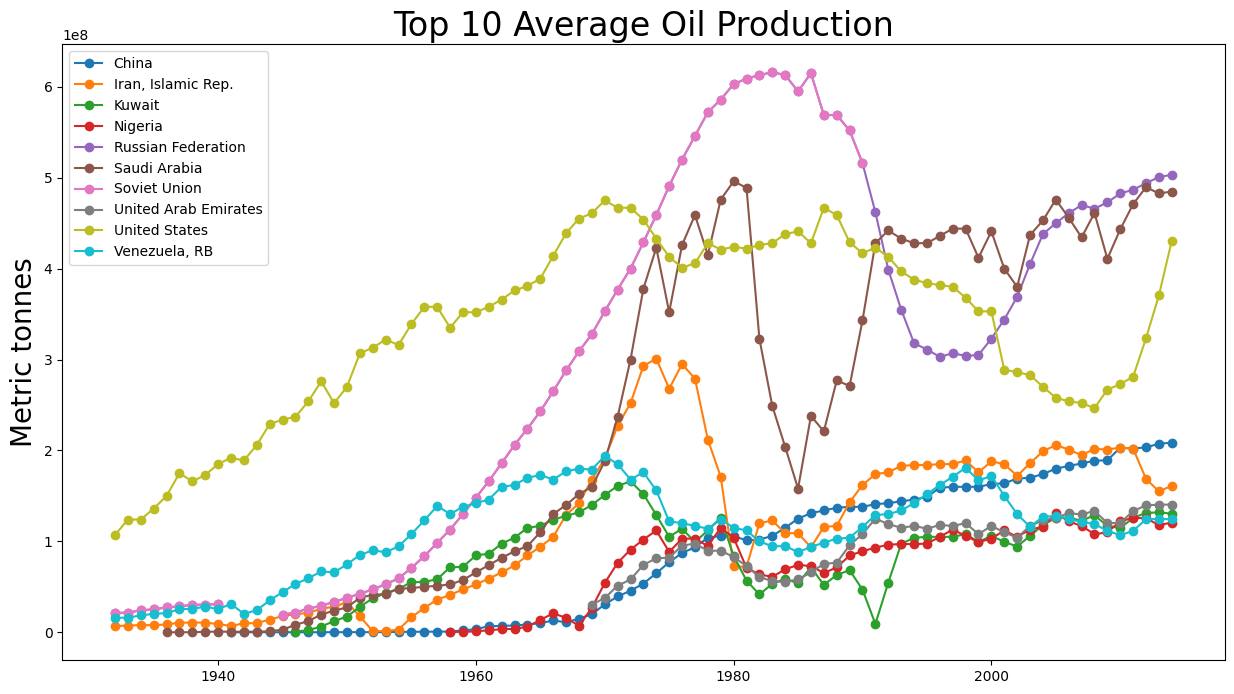

In [24]:
plot_topn_production (production_df, analysis_type='avg', topn=10)


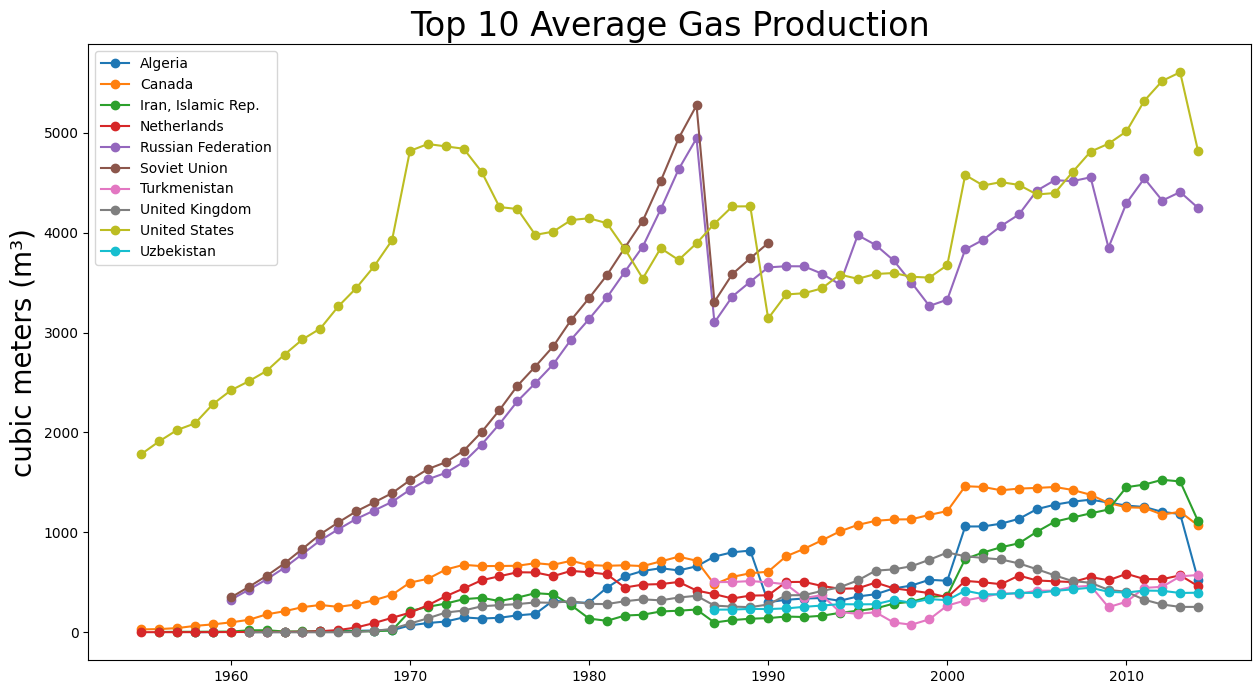

In [25]:
plot_topn_production (production_df, commodity='gas', analysis_type='avg', topn=10)


## Export

In [26]:
data.columns

Index(['cty_name', 'iso3numeric', 'id', 'year', 'eiacty', 'oil_prod32_14',
       'oil_price_2000', 'oil_price_nom', 'oil_value_nom', 'oil_value_2000',
       'oil_value_2014', 'gas_prod55_14', 'gas_price_2000_mboe',
       'gas_price_2000', 'gas_price_nom', 'gas_value_nom', 'gas_value_2000',
       'gas_value_2014', 'oil_gas_value_nom', 'oil_gas_value_2000',
       'oil_gas_value_2014', 'oil_gas_valuePOP_nom', 'oil_gas_valuePOP_2000',
       'oil_gas_valuePOP_2014', 'oil_exports', 'net_oil_exports',
       'net_oil_exports_mt', 'net_oil_exports_value',
       'net_oil_exports_valuePOP', 'gas_exports', 'net_gas_exports_bcf',
       'net_gas_exports_mboe', 'net_gas_exports_value',
       'net_gas_exports_valuePOP', 'net_oil_gas_exports_valuePOP',
       'population', 'pop_maddison', 'sovereign', 'mult_nom_2000',
       'mult_nom_2014', 'mult_2000_2014'],
      dtype='object')

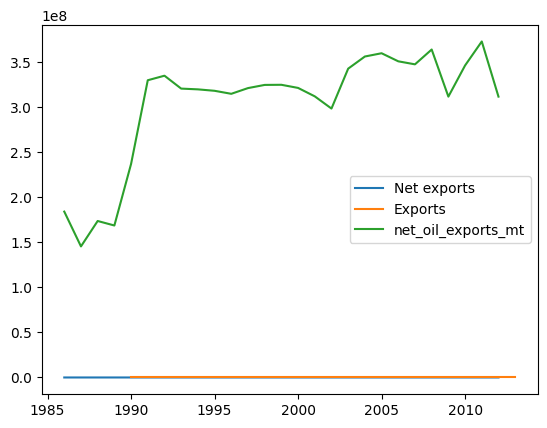

In [27]:
country= data[data['cty_name']=='Saudi Arabia']

plt.plot(country['year'], country['net_oil_exports'], label='Net exports')
plt.plot(country['year'], country['gas_exports'], label='Exports')
plt.plot(country['year'], country['net_oil_exports_mt'], label='net_oil_exports_mt')
plt.legend()

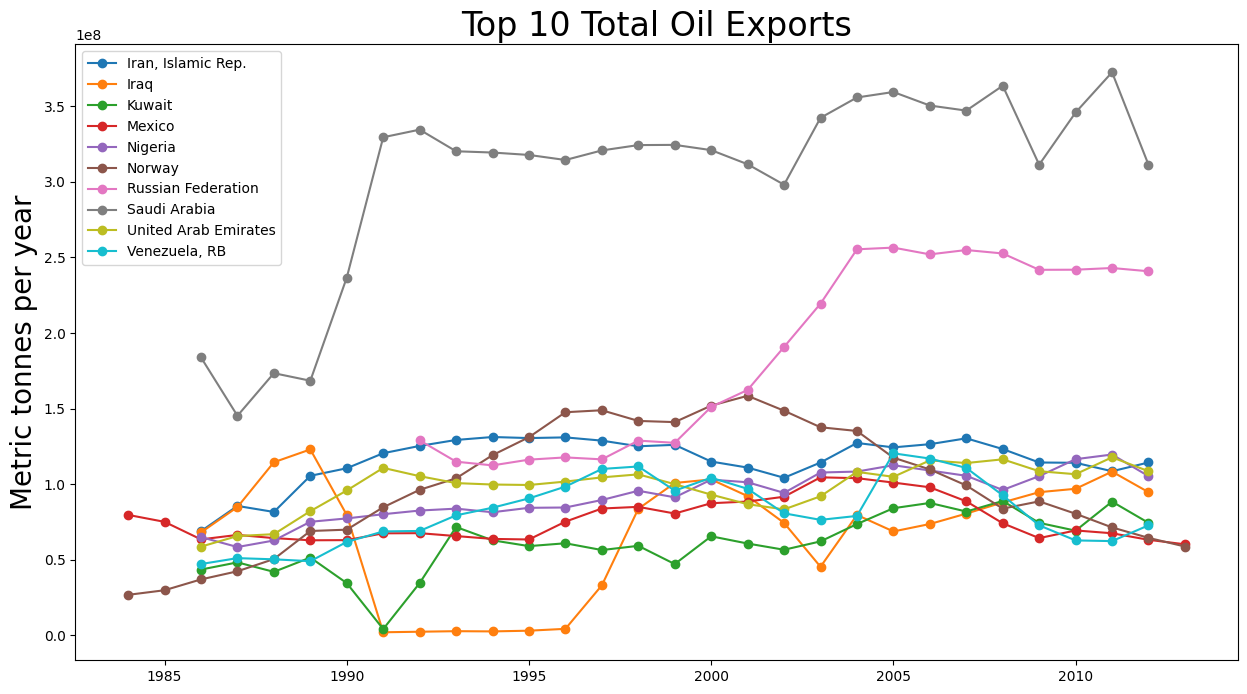

In [28]:
plot_topn_export (data, commodity='oil', analysis_type='sum', topn=10)

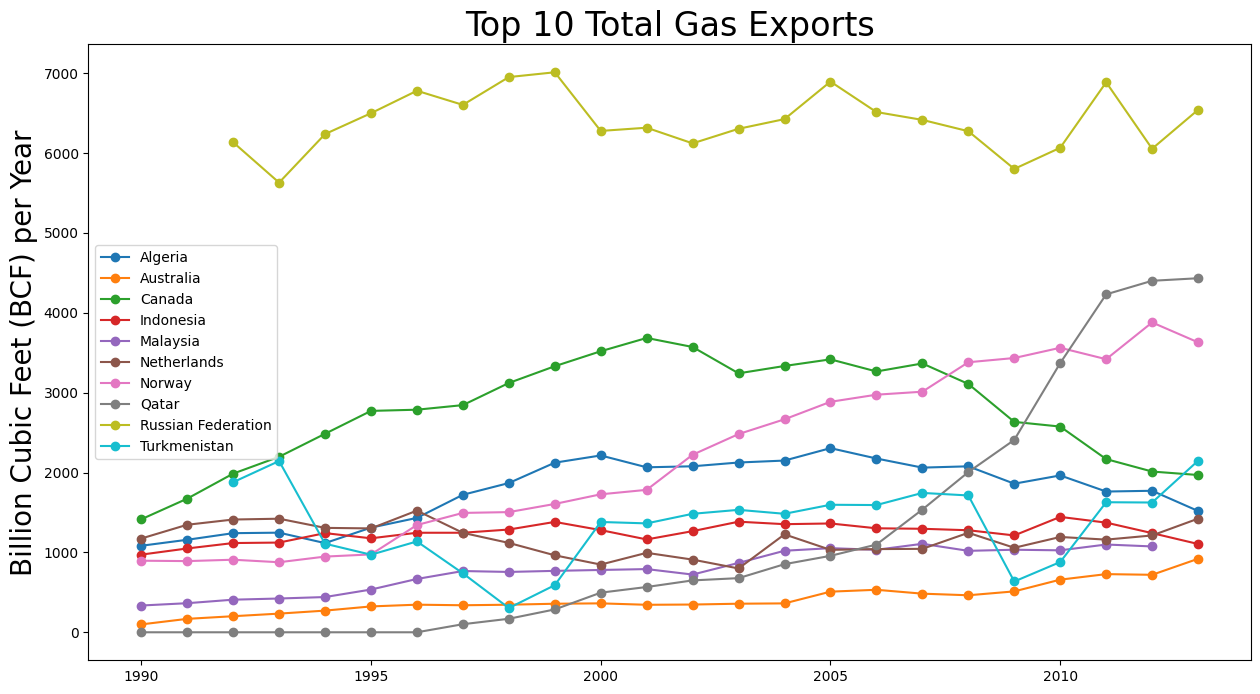

In [29]:
plot_topn_export (production_df, commodity='gas', analysis_type='sum', topn=10)


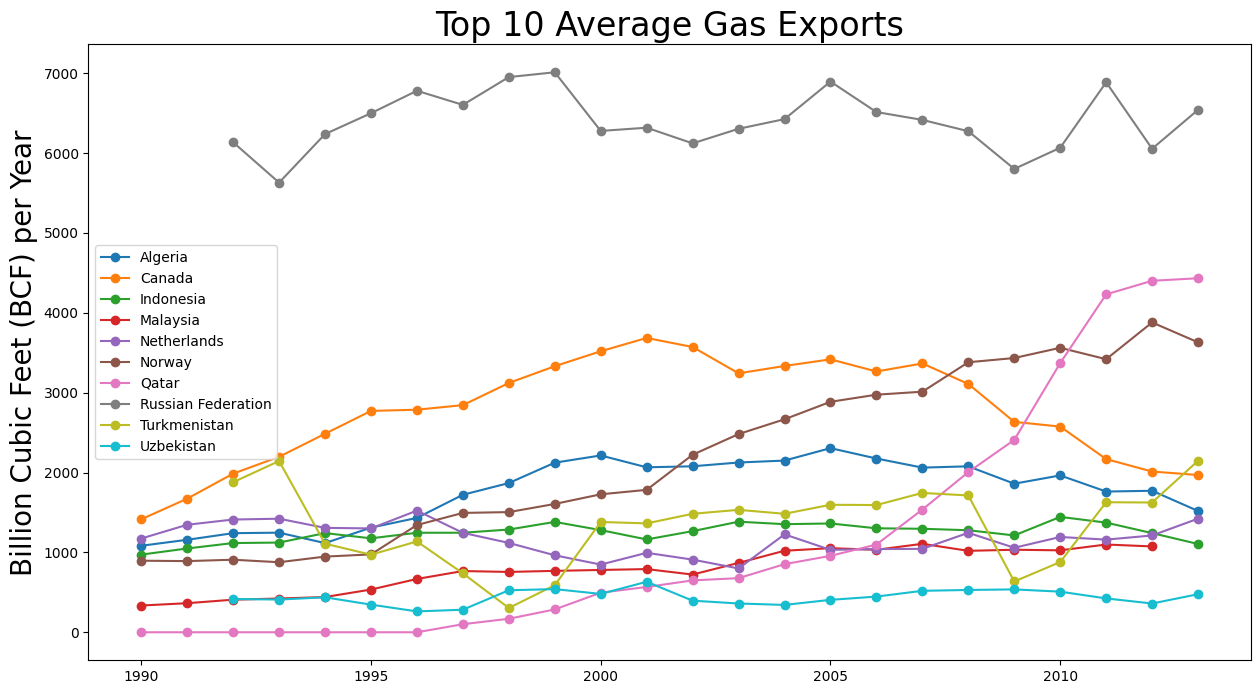

In [30]:
plot_topn_export (production_df, commodity='gas', analysis_type='avg', topn=10)

## Price 

In [31]:
price=data[['cty_name', 'year']+[col for col in data.columns if 'price' in col]]

<Axes: xlabel='year'>

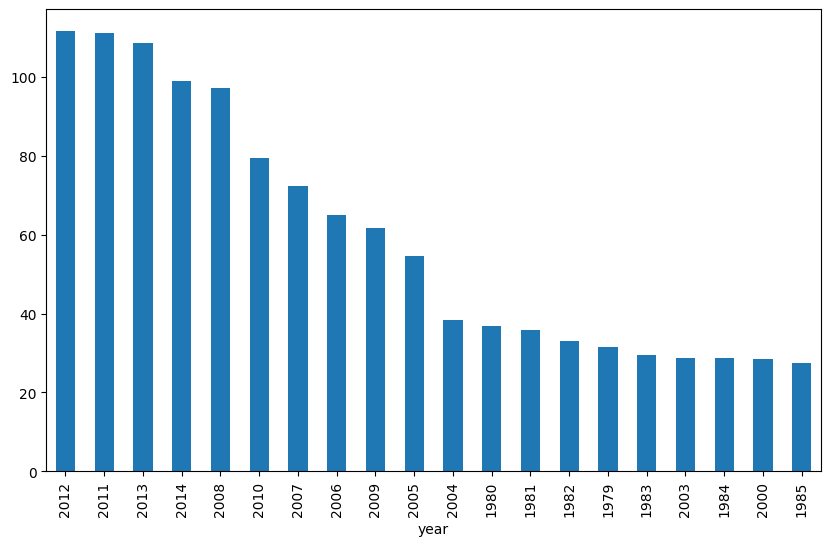

In [32]:
price.groupby('year')['oil_price_nom'].mean().sort_values(ascending=False).head(20).plot(kind='bar', figsize=(10, 6))


In [33]:
price

cty_name  year  oil_price_2000  oil_price_nom  gas_price_2000_mboe  \
0      Afghanistan  1932       10.860860       0.870000         0.000000e+00   
1      Afghanistan  1933        8.815239       0.670000         0.000000e+00   
2      Afghanistan  1934       12.715790       1.000000         0.000000e+00   
3      Afghanistan  1935       12.039690       0.970000         0.000000e+00   
4      Afghanistan  1936       13.383210       1.090000         0.000000e+00   
...            ...   ...             ...            ...                  ...   
15516     Zimbabwe  2010       62.778052      79.495534         1.915340e+07   
15517     Zimbabwe  2011       85.170708     111.255598         1.637074e+07   
15518     Zimbabwe  2012       83.754465     111.669702         1.080083e+07   
15519     Zimbabwe  2013       80.319530     108.658518         1.483600e+07   
15520     Zimbabwe  2014       71.972588      98.946008         1.712125e+07   

       gas_price_2000  gas_price_nom  
0                 NaN       0.060000  
1                 NaN       0.060000  
2                 NaN       0.060000  
3                 NaN       0.060000  
4                 NaN       0.060000  
...               ...            ...  
15516        3.537880       4.480000  
15517        3.023886       3.950000  
15518        1.995052       2.660000  
15519        2.740400       3.707290  
15520        3.162515       4.347742  

[15521 rows x 7 columns]

<Axes: xlabel='year'>

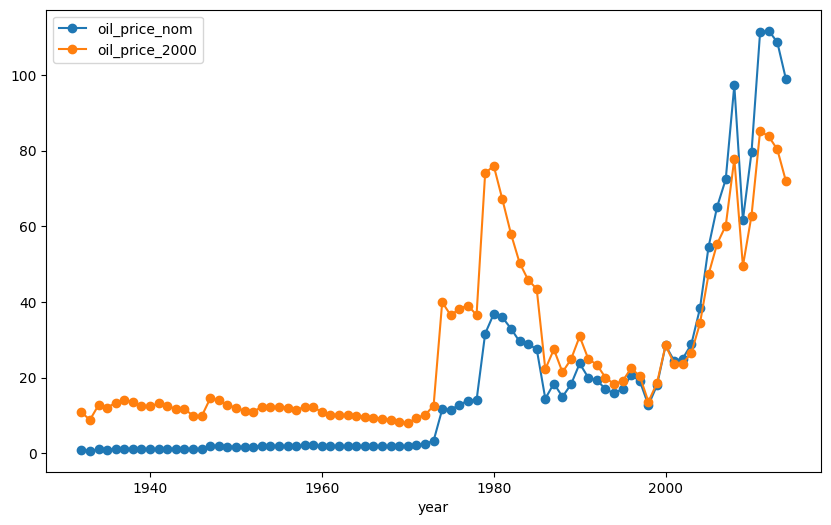

In [34]:
price.groupby('year')[['oil_price_nom', 'oil_price_2000']].mean().plot(figsize=(10, 6), marker='o')


## Oil/Gas Value

In [35]:
value=data[['cty_name', 'year']+[col for col in data.columns if 'value' in col and 'POP' not in col]]
value


cty_name  year  oil_value_nom  oil_value_2000  oil_value_2014  \
0      Afghanistan  1932            NaN             NaN             NaN   
1      Afghanistan  1933            NaN             NaN             NaN   
2      Afghanistan  1934            NaN             NaN             NaN   
3      Afghanistan  1935            NaN             NaN             NaN   
4      Afghanistan  1936            NaN             NaN             NaN   
...            ...   ...            ...             ...             ...   
15516     Zimbabwe  2010            0.0             0.0             0.0   
15517     Zimbabwe  2011            0.0             0.0             0.0   
15518     Zimbabwe  2012            0.0             0.0             0.0   
15519     Zimbabwe  2013            0.0             0.0             0.0   
15520     Zimbabwe  2014            0.0             0.0             0.0   

       gas_value_nom  gas_value_2000  gas_value_2014  oil_gas_value_nom  \
0                NaN             NaN             NaN                NaN   
1                NaN             NaN             NaN                NaN   
2                NaN             NaN             NaN                NaN   
3                NaN             NaN             NaN                NaN   
4                NaN             NaN             NaN                NaN   
...              ...             ...             ...                ...   
15516            0.0             0.0             0.0                0.0   
15517            0.0             0.0             0.0                0.0   
15518            0.0             0.0             0.0                0.0   
15519            0.0             0.0             0.0                0.0   
15520            NaN             NaN             NaN                0.0   

       oil_gas_value_2000  oil_gas_value_2014  net_oil_exports_value  \
0                     NaN                 NaN                    NaN   
1                     NaN                 NaN                    NaN   
2                     NaN                 NaN                    NaN   
3                     NaN                 NaN                    NaN   
4                     NaN                 NaN                    NaN   
...                   ...                 ...                    ...   
15516                 0.0                 0.0                    0.0   
15517                 0.0                 0.0                    0.0   
15518                 0.0                 0.0                    0.0   
15519                 0.0                 0.0                    NaN   
15520                 0.0                 0.0                    NaN   

       net_gas_exports_value  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  
...                      ...  
15516                    0.0  
15517                    0.0  
15518                    0.0  
15519                    NaN  
15520                    NaN  

[15521 rows x 13 columns]

<Axes: xlabel='cty_name'>

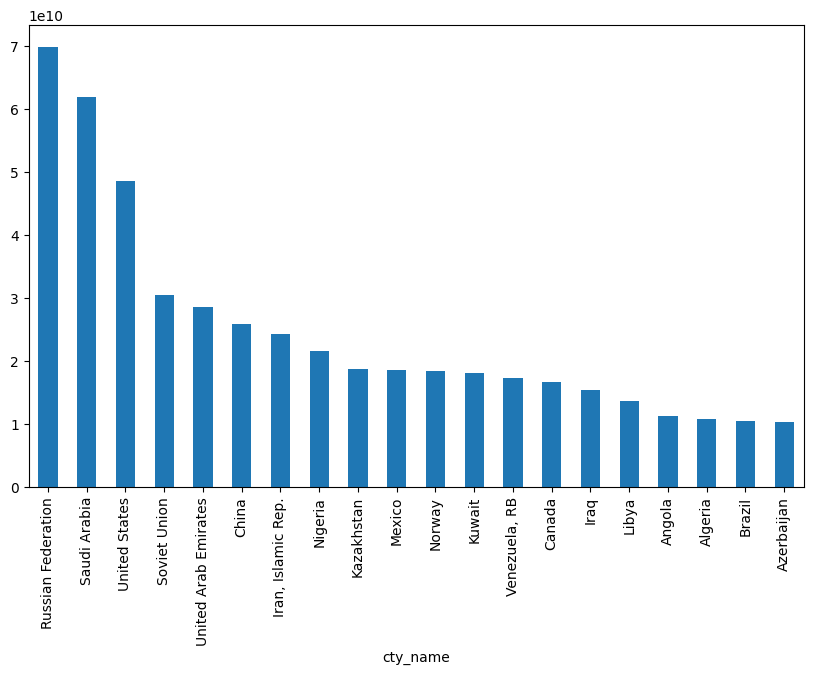

In [36]:
value.groupby('cty_name')['oil_value_nom'].mean().sort_values(ascending=False).head(20).plot(kind='bar', figsize=(10, 6))


<Axes: xlabel='year'>

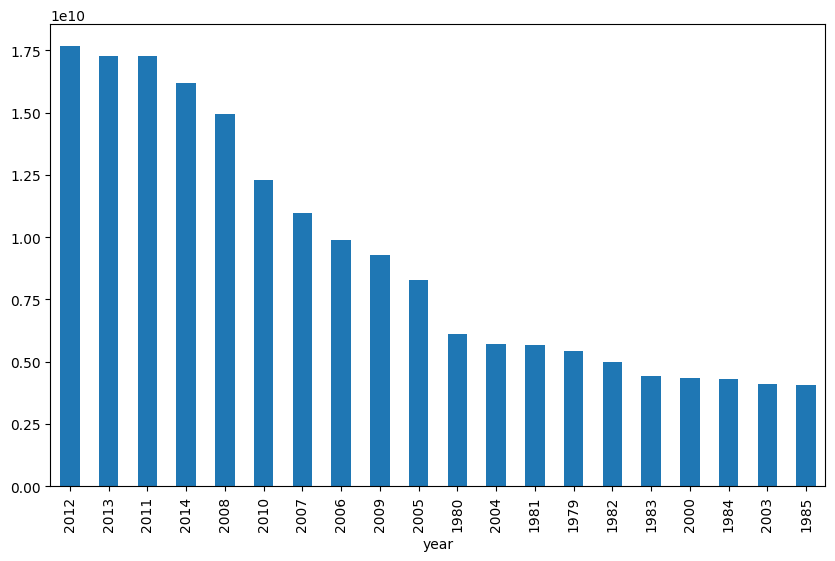

In [37]:
value.groupby('year')['oil_value_nom'].mean().sort_values(ascending=False).head(20).plot(kind='bar', figsize=(10, 6))


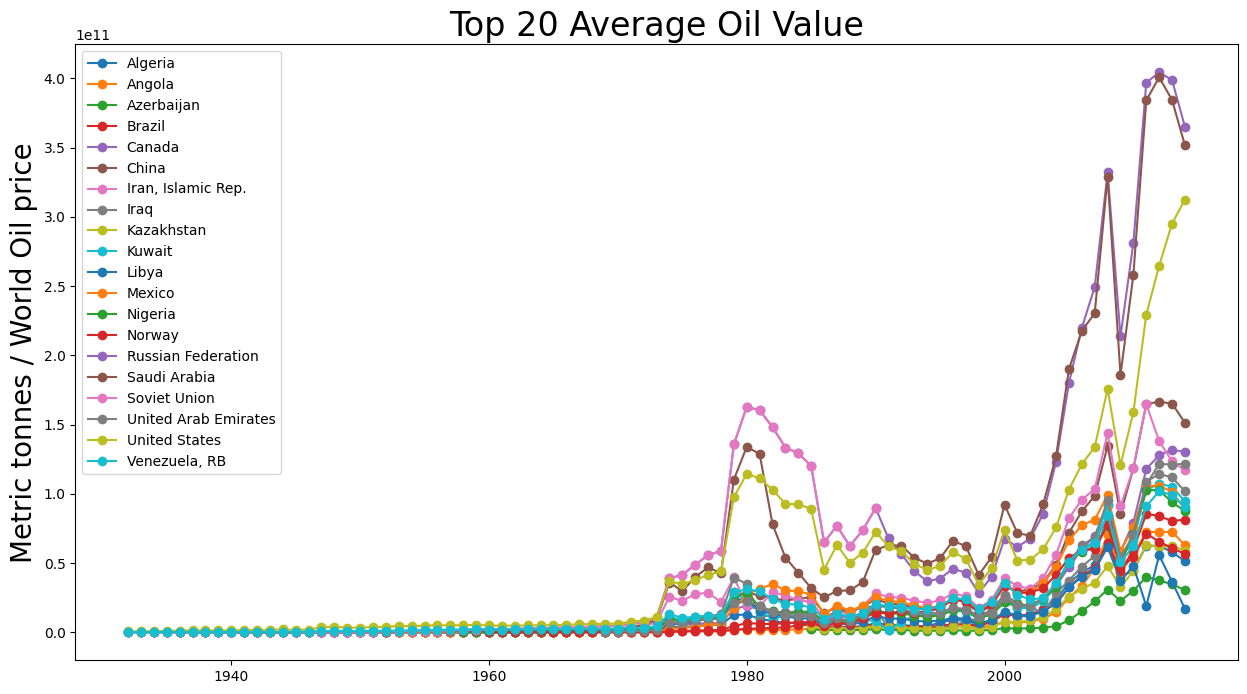

In [38]:
plot_topn_value (value, commodity='oil', analysis_type='avg', topn=20)


Text(0.5, 1.0, "Timeseries plot of Top 20 Country's oil Value")

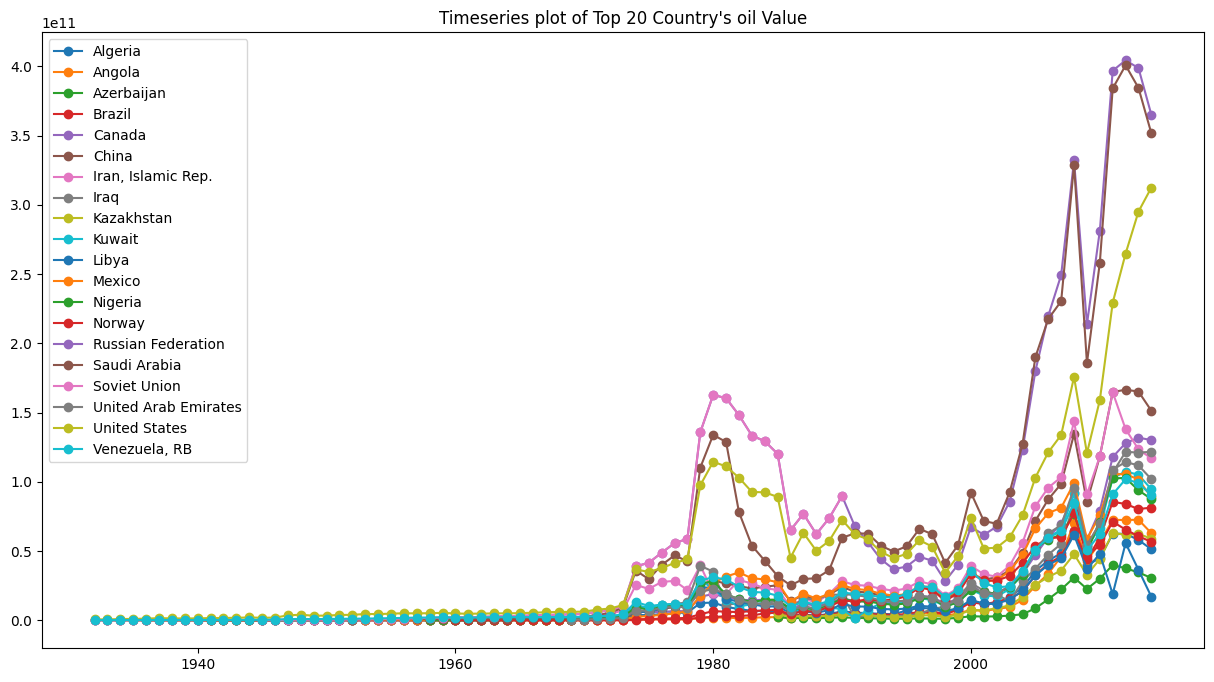

In [39]:
total_production = value.groupby('cty_name')['oil_value_nom'].mean().nlargest(20)
top_countries = total_production.index

top_df = value[value['cty_name'].isin(top_countries)]

# Create the plot
plt.figure(figsize=(15, 8))

# Group by country and plot each country's oil production over time
for country, group_data in top_df.groupby('cty_name'):
    plt.plot(group_data['year'], group_data['oil_value_nom'], marker='o', label=country)

plt.legend()
plt.title("Timeseries plot of Top 20 Country's oil Value")

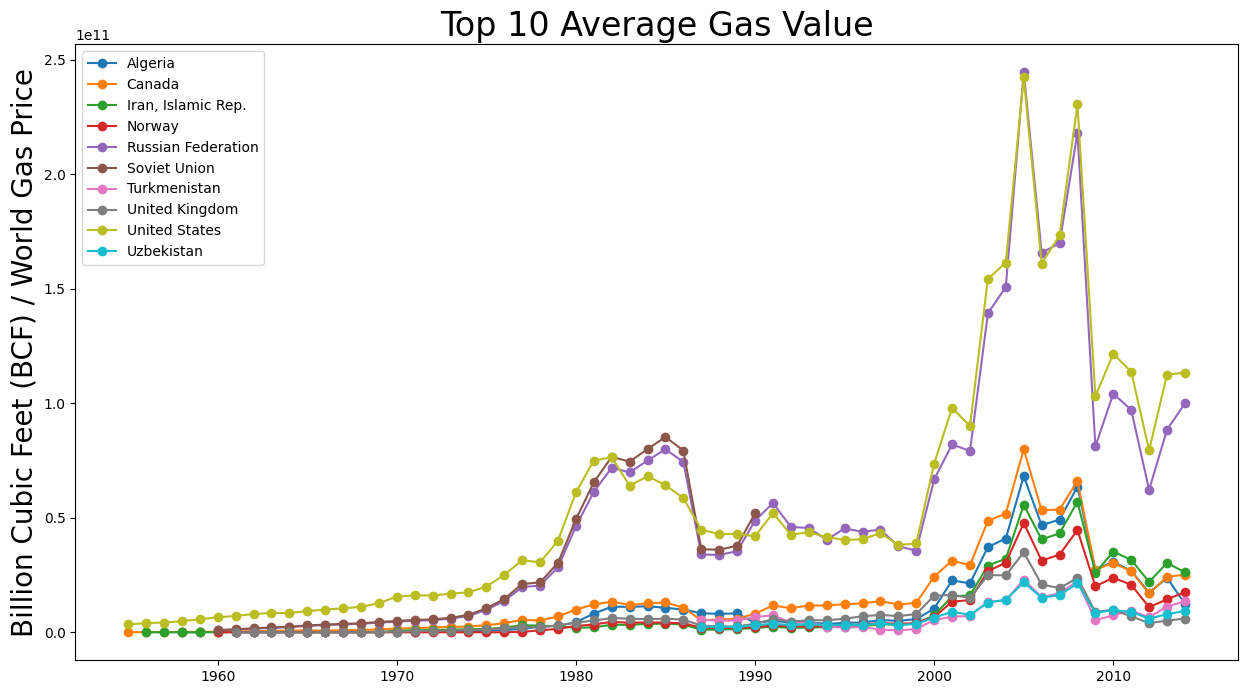

In [43]:
plot_topn_value (value, commodity='gas', analysis_type='avg', topn=10)


let's create a function that we can always call to create plot

## Production Volume Vs Price

In [ ]:
country

In [67]:
all_country=data['cty_name'].unique().tolist()

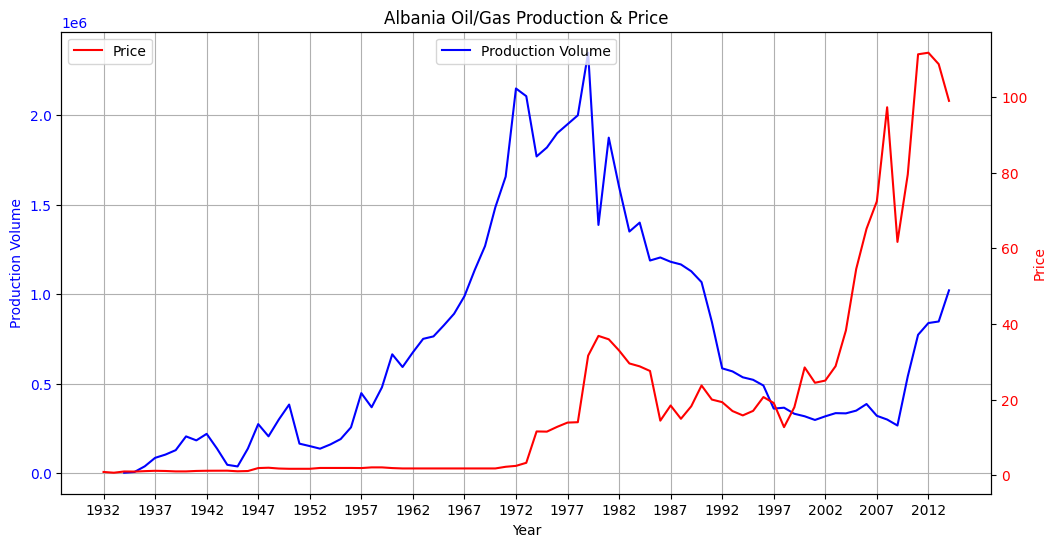

In [87]:
country_name=all_country[1]
country_df= data[data['cty_name']==country_name]

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot production volume on the primary y-axis
ax1.set_xlabel('Year')
ax1.set_ylabel('Production Volume', color='blue')
ax1.plot(country_df['year'], country_df['oil_prod32_14'], color='blue', label='Production Volume')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for the price
ax2 = ax1.twinx()
ax2.set_ylabel('Price', color='red')
ax2.plot(country_df['year'], country_df['oil_price_nom'], color='red', label='Price')
ax2.tick_params(axis='y', labelcolor='red')

ax1.set_xticks(np.arange(country_df['year'].min(), country_df['year'].max()+1, 5.0))

ax1.legend(loc='upper center')
ax2.legend()
ax1.grid()
plt.title(f"{country_name} Oil/Gas Production & Price")

plt.show()

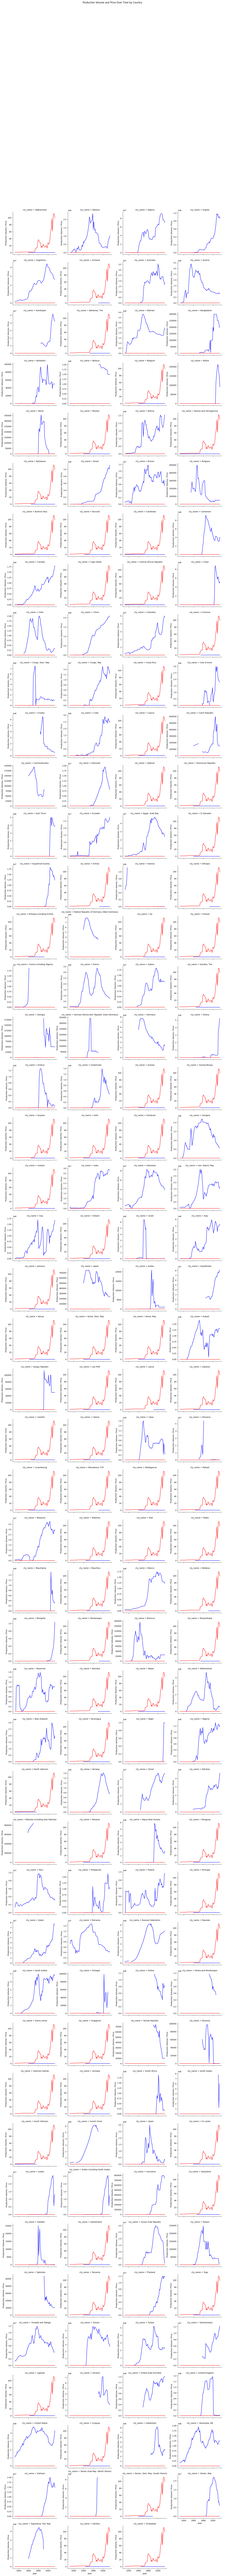

In [88]:
g = sns.FacetGrid(data, col='cty_name', col_wrap=4, sharey=False, sharex=True, height=4)
g = g.map(plt.plot, 'year', 'oil_prod32_14', color='blue').add_legend()
g = g.map(plt.plot, 'year', 'oil_price_nom', color='red').add_legend()

for ax in g.axes.flat:
    ax.set_ylabel('Production Volume / Price')

g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Production Volume and Price Over Time by Country')
plt.show()

In [55]:
data.columns

Index(['cty_name', 'iso3numeric', 'id', 'year', 'eiacty', 'oil_prod32_14',
       'oil_price_2000', 'oil_price_nom', 'oil_value_nom', 'oil_value_2000',
       'oil_value_2014', 'gas_prod55_14', 'gas_price_2000_mboe',
       'gas_price_2000', 'gas_price_nom', 'gas_value_nom', 'gas_value_2000',
       'gas_value_2014', 'oil_gas_value_nom', 'oil_gas_value_2000',
       'oil_gas_value_2014', 'oil_gas_valuePOP_nom', 'oil_gas_valuePOP_2000',
       'oil_gas_valuePOP_2014', 'oil_exports', 'net_oil_exports',
       'net_oil_exports_mt', 'net_oil_exports_value',
       'net_oil_exports_valuePOP', 'gas_exports', 'net_gas_exports_bcf',
       'net_gas_exports_mboe', 'net_gas_exports_value',
       'net_gas_exports_valuePOP', 'net_oil_gas_exports_valuePOP',
       'population', 'pop_maddison', 'sovereign', 'mult_nom_2000',
       'mult_nom_2014', 'mult_2000_2014'],
      dtype='object')

## Individual Country

In [41]:
data.columns


Index(['cty_name', 'iso3numeric', 'id', 'year', 'eiacty', 'oil_prod32_14',
       'oil_price_2000', 'oil_price_nom', 'oil_value_nom', 'oil_value_2000',
       'oil_value_2014', 'gas_prod55_14', 'gas_price_2000_mboe',
       'gas_price_2000', 'gas_price_nom', 'gas_value_nom', 'gas_value_2000',
       'gas_value_2014', 'oil_gas_value_nom', 'oil_gas_value_2000',
       'oil_gas_value_2014', 'oil_gas_valuePOP_nom', 'oil_gas_valuePOP_2000',
       'oil_gas_valuePOP_2014', 'oil_exports', 'net_oil_exports',
       'net_oil_exports_mt', 'net_oil_exports_value',
       'net_oil_exports_valuePOP', 'gas_exports', 'net_gas_exports_bcf',
       'net_gas_exports_mboe', 'net_gas_exports_value',
       'net_gas_exports_valuePOP', 'net_oil_gas_exports_valuePOP',
       'population', 'pop_maddison', 'sovereign', 'mult_nom_2000',
       'mult_nom_2014', 'mult_2000_2014'],
      dtype='object')

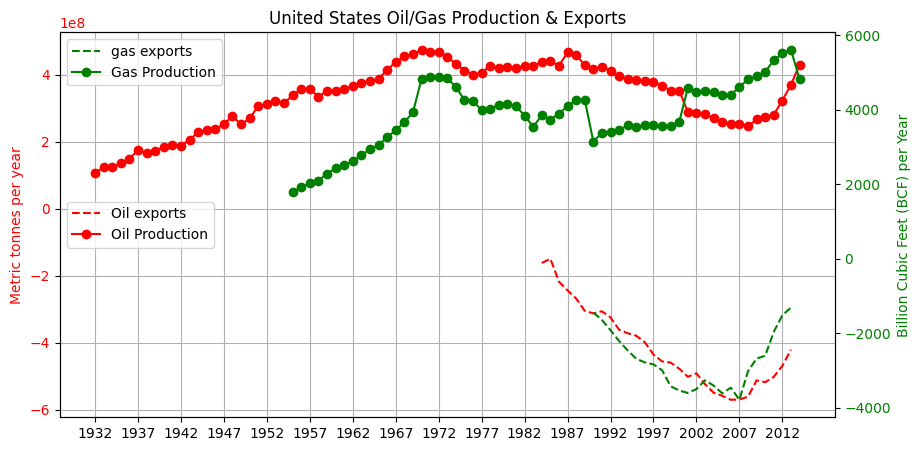

In [82]:
plot_country_production_export (data, 'United States')

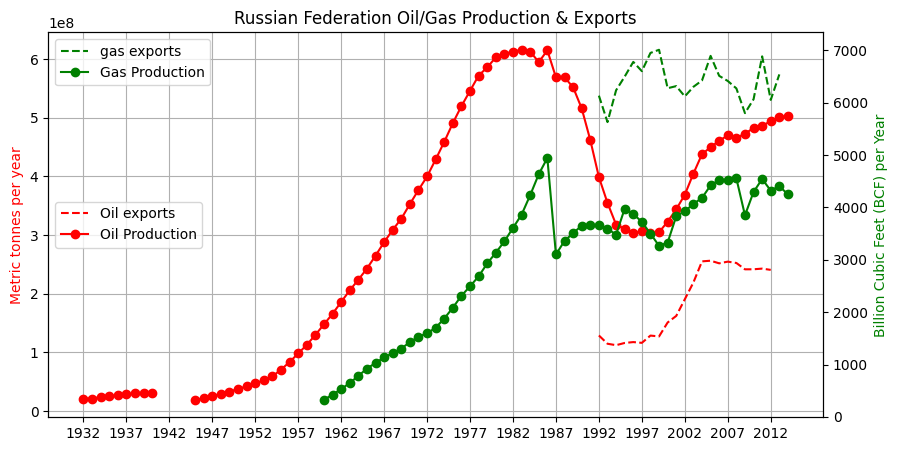

In [92]:
plot_country_production_export (data, 'Russian Federation')

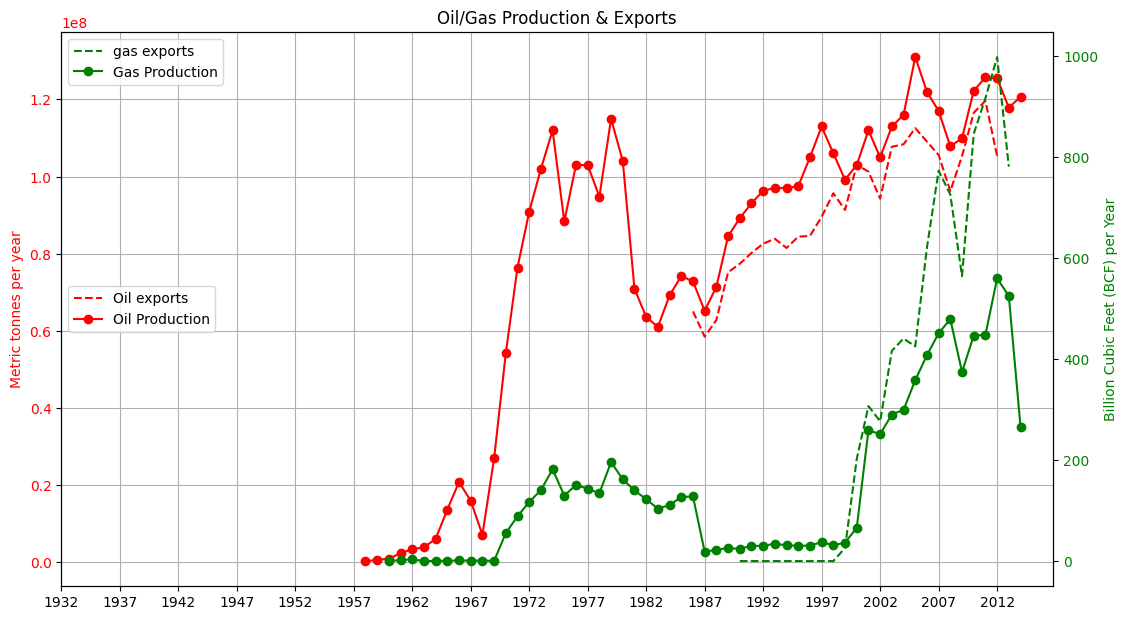

In [91]:
plot_country_production_export (data, 'Nigeria')

# Conclusion
The analysis of the global oil and gas dataset from 1932 to 2014 provides valuable insights into the historical trends and patterns of the energy sector. Key findings include:


    Production Trends:

Significant growth in oil and gas production over the analyzed period, with notable peaks and troughs corresponding to major geopolitical events.
The top oil-producing countries have remained relatively consistent, though there are shifts in their respective production volumes.

    Price Fluctuations:

Oil and gas prices exhibit substantial volatility, influenced by global economic conditions, technological advancements, and geopolitical tensions.
Strong correlations between production volumes and prices, with prices often reacting sharply to changes in production.


    Export Patterns:

Export and net export data reveal shifting trade patterns, with certain countries emerging as major exporters over time.
The impact of policy changes, technological advancements, and international agreements is evident in the export data.


    Regional Comparisons:
Clear regional differences in production and export capabilities, with certain regions dominating specific aspects of the oil and gas market.
This comprehensive analysis underscores the importance of historical data in understanding the dynamics of the global oil and gas industry, informing future policy decisions, and guiding strategic planning. Further research could delve into more granular aspects of the data, such as the impact of specific technological innovations or policy changes on production and pricing trends.

# Reference
Harvard Dataverse


Ross, Michael; Mahdavi, Paasha, 2015, "Oil and Gas Data, 1932-2014", https://doi.org/10.7910/DVN/ZTPW0Y, Harvard Dataverse, V2, UNF:6:xdrpUdF2kYUJYCgVfgMGcQ== [fileUNF]